## Average amount of time spent in the league of legends games
I would expect the games to be a normal distribution, peaking around 30 minutes in game. For this, I will only use the same game "map", aka the fields of justice for those who are familiar with it. I expect this to be normal because the game makers target 30 minutes for the game, so I would expect my playtimes to cluster around that. 

In [15]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")

In [2]:
times= [33.75,12.33,33.9,29.5,44.25,32.9,23.25,41.5,36.6,32.45,35.5,19.75,28.4,24.1,32.25,38.33,33.75,30,29.5,22.75,29.8,27.75]

In [7]:
mu = np.mean(times)
print('mean=',mu)

mean= 30.559545454545454


In [8]:
sd= np.std(times)
print('standard deviation is',sd)

standard deviation is 7.04796003837134


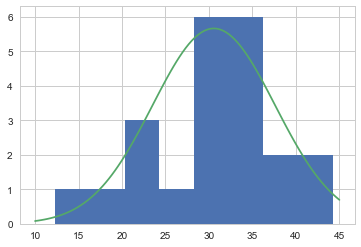

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(times,bins='auto')
xs = np.linspace(10,45,100)
ax.plot(xs,stats.norm.pdf(xs,mu,sd)*100)
plt.show()
plt.close()

## Average amount of between car accidents in a single city
I would expect the games to be a normal distribution, peaking around 30 minutes in game. For this, I will only use the same game "map", aka the fields of justice for those who are familiar with it. The city in question is Somerville, MA. I expect this to be exponential in nature, due to the memorylessness of car accident timings.

This data can be downloaded here: https://catalog.data.gov/dataset/motor-vehicle-crash-reports

In [65]:
accidents = pd.read_csv('Motor_Vehicle_Crash_Reports.csv')

accidents_filtered = accidents.loc[accidents['Time'] != 'unk']

accidents_filtered['Datetime'] = pd.to_datetime(accidents_filtered['Date']+' '+accidents_filtered['Time'],format = "%m/%d/%Y %H:%M")

accidents_filtered = accidents_filtered.sort_values('Datetime')

time_diff = (accidents_filtered['Datetime']-accidents_filtered['Datetime'].shift(1)).astype('timedelta64[h]')

#getting rid of the first row
time_diff = time_diff.loc[~time_diff.isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [64]:
print('mean',np.mean(time_diff))
print('max',np.max(time_diff))
print('min',np.min(time_diff))

mean 17.52208240809277
max 197.0
min 0.0


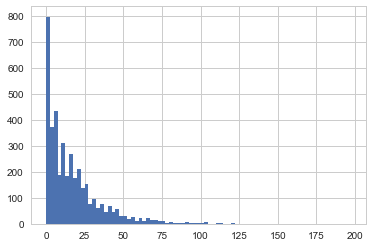

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(time_diff,bins='auto')
plt.show()
plt.close()

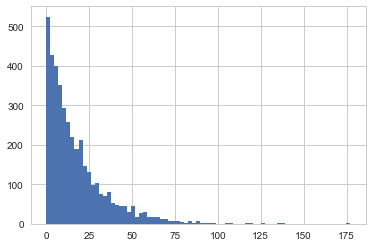

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
np.random.seed([12448775])
exp = np.random.exponential(17.52208240809277,size=len(time_diff))
ax.hist(exp,bins='auto')
plt.show()
plt.close()

We can see that this is almost exactly an exponential equation